# Machine Learning II: Assignments 1
Leon Berghoff, Jiawei Li, Strahinja Trenkic, Otto Riess

In [1]:
# Make sure you have installed the required package and restarted the notebook server
# %pip install ipywidgets ipympl

## Covid-19 Disasters
The SIR model is a 3-compartment model. Extend this model to 4 compartments, where the 4th compartment is for deaths $D$. Mortality is modelled by new transitions from $I → D$ deﬁned by the mortality rate $µ$. Susceptible and Recovered do not die.

(a) Derive the corresponding system of equations for $S$, $I$, $R$ and $D$. But this is not the only difference to SIR. In addition, the basic reproduction number may now depend on $\mu$ as well, how?

The SIRD model is:

$$
\begin{aligned}
\frac{d S}{d t} &= -\frac{\beta I S}{N} \\
\frac{d I}{d t} &=\frac{\beta I S}{N}-\gamma I-\mu I \\
\frac{d R}{d t} &=\gamma I \\
\frac{d D}{d t} &=\mu I \\
\end{aligned}
$$

Assume that the birth rates and death rates are equal, the population $N$ is constant:

$$
S + I + R + D = N
$$

The basic reproduction number, $R_0$, is defined as the expected number of cases directly caused by one case at time 0 in a population where all individuals are susceptible. In SIRD model, the $R_0$ is:

$$
R_0 = \frac{\beta}{\gamma + \mu}
$$

(b) Assume that the basic reproduction number $R_{0}$ for B.1.1.7 is not exactly known but only the range $R_{0} \in[3.0,4.0]$. Assume that the mortality rate $\mu$ is also not exactly known but only the range $\mu \in[0.4 \%, 4 \%]$. Study how these parameter uncertainties affect the prediction of $D$ at $t=365 d$. What about the cumulative number of deaths after a year?

In [1]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [ ]:
%matplotlib inline
def plot_sird(r_nought=None, gamma=None, mu=None):
    # Population size
    N = 100
    
    # Initially, only 1 infected
    I0 = 1
    
    # Initially, no recovered individuals, no death
    R0, D0 = 0, 0

    # Initially, S0=N-I0-R0-D0
    S0 = N - I0 - R0 - D0

    # Basic reproduction number r_nought = beta / (gamma + mu)
    beta = r_nought * (gamma + mu)
            
    # SIRD model
    def deriv(y, t, N, beta, gamma, mu):
        S, I, R, D = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I - mu * I
        dRdt = gamma * I
        dDdt = mu * I
        return dSdt, dIdt, dRdt, dDdt

    # Initial conditions vector
    y0 = (S0, I0, R0, D0)
    
    # A grid of time points (in days)
    t = np.linspace(0, 365, 365)
    
    # Integrate the SIRD equations over the time grid t
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
    S, I, R, D = ret.T
    
    # Plot the data on four separate curves for S(t), I(t), R(t) and D(t)
    fig, ax = plt.subplots(figsize=(6,3), constrained_layout=True)
    ax.set_title(f'beta={round(beta,2)}, gamma={round(gamma,2)}, mu={round(mu,3)}')
    ax.plot(t, S/N, 'b', alpha=0.5, lw=1, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=1, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=1, label='Recovered')
    ax.plot(t, D/N, 'k', alpha=0.5, lw=1, label='Deaths')
    ax.legend()
    return ax

interactive_plot = interactive(plot_sird, r_nought=(3,4,0.1), gamma=(0.01,1,0.01), mu=(0.004,0.04,0.001))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

In [3]:
%matplotlib widget
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [4]:
def plot_sird(percent=None, r_nought=None, beta=None, gamma=None, mu=None):
    # Population size
    N = 100
    
    if percent is None:
        # Initially, only 1 infected
        I0 = 1
    else:
        # Start with more than 1% infected individuals
        I0 = percent * N
    
    # Initially, no recovered individuals, no death
    R0, D0 = 0, 0

    # Initially, S0=N-I0-R0-D0
    S0 = N - I0 - R0 - D0

    # Basic reproduction number r_nought = beta / (gamma + mu)
    if beta is None:
        beta = r_nought * (gamma + mu)
    elif gamma is None:
        gamma = beta / r_nought - mu
            
    # SIRD model
    def deriv(y, t, N, beta, gamma, mu):
        S, I, R, D = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I - mu * I
        dRdt = gamma * I
        dDdt = mu * I
        return dSdt, dIdt, dRdt, dDdt

    # Initial conditions vector
    y0 = (S0, I0, R0, D0)
    
    # A grid of time points (in days)
    t = np.linspace(0, 365, 365)
    
    # Integrate the SIRD equations over the time grid t
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
    S, I, R, D = ret.T
    
    # Plot the data on four separate curves for S(t), I(t), R(t) and D(t)
    ax.set_title(f'beta={round(beta,2)}, gamma={round(gamma,2)}, mu={round(mu,3)}')
    ax.plot(t, S/N, 'b', alpha=0.5, lw=1, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=1, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=1, label='Recovered')
    ax.plot(t, D/N, 'k', alpha=0.5, lw=1, label='Deaths')
    ax.legend()
    return ax

In [15]:
%matplotlib inline
def plot_sird(r_nought=None, gamma=None, mu=None):
    # Population size
    N = 100
    
    # Initially, only 1 infected
    I0 = 1
    
    # Initially, no recovered individuals, no death
    R0, D0 = 0, 0

    # Initially, S0=N-I0-R0-D0
    S0 = N - I0 - R0 - D0

    # Basic reproduction number r_nought = beta / (gamma + mu)
    beta = r_nought * (gamma + mu)
            
    # SIRD model
    def deriv(y, t, N, beta, gamma, mu):
        S, I, R, D = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I - mu * I
        dRdt = gamma * I
        dDdt = mu * I
        return dSdt, dIdt, dRdt, dDdt

    # Initial conditions vector
    y0 = (S0, I0, R0, D0)
    
    # A grid of time points (in days)
    t = np.linspace(0, 365, 365)
    
    # Integrate the SIRD equations over the time grid t
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
    S, I, R, D = ret.T
    
    # Plot the data on four separate curves for S(t), I(t), R(t) and D(t)
    fig, ax = plt.subplots(figsize=(6,3), constrained_layout=True)
    ax.set_title(f'beta={round(beta,2)}, gamma={round(gamma,2)}, mu={round(mu,3)}')
    ax.plot(t, S/N, 'b', alpha=0.5, lw=1, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=1, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=1, label='Recovered')
    ax.plot(t, D/N, 'k', alpha=0.5, lw=1, label='Deaths')
    ax.legend()
    return ax

interactive_plot = interactive(plot_sird, r_nought=(3,4,0.1), gamma=(0.01,1,0.01), mu=(0.004,0.04,0.001))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=3.0, description='r_nought', max=4.0, min=3.0), FloatSlider(value=0.5,…

In [5]:
output = widgets.Output()

with output:
    fig, ax = plt.subplots(figsize=(6,3), constrained_layout=True)
    fig.suptitle('SIRD Model with Different $R_0$, $\gamma$ and $\mu$', fontsize=14, fontweight='bold')
    # Remove the toolbar and header
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax.set_xlabel('Time / days')
    ax.set_ylabel('Fraction')
    ax.set_ylim(0,1)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=1, ls='-')

plot_sird(r_nought=3, gamma=0.01, mu=0.004)

# Create control elements
label_r_nought = widgets.Label(r'$R_0$:', layout=widgets.Layout(width='2em'))
slider_r_nought = widgets.FloatSlider(
    value=3,
    min=3,
    max=4)
label_gamma = widgets.Label(r'$\gamma$:', layout=widgets.Layout(width='2em'))
slider_gamma = widgets.FloatSlider(
    value=0.01,
    min=0.01,
    max=1,
    step=0.01)
label_mu = widgets.Label(r'$\mu$:', layout=widgets.Layout(width='2em'))
slider_mu = widgets.FloatSlider(
    value=0.004,
    min=0.004,
    max=0.0401,
    step=0.001,
    readout_format='.3f')

# Callback functions
def update_r_nought(slider):
    ax.lines = []
    plot_sird(r_nought=slider.new, gamma=slider_gamma.value, mu=slider_mu.value)

def update_gamma(slider):
    ax.lines = []
    plot_sird(r_nought=slider_r_nought.value, gamma=slider.new, mu=slider_mu.value)

def update_mu(slider):
    ax.lines = []
    plot_sird(r_nought=slider_r_nought.value, gamma=slider_gamma.value, mu=slider.new)

# Observe change
slider_r_nought.observe(update_r_nought, 'value')
slider_gamma.observe(update_gamma, 'value')
slider_mu.observe(update_mu, 'value')

controls =  widgets.VBox([widgets.HBox([label_r_nought, slider_r_nought]),
            widgets.HBox([label_gamma, slider_gamma]),
            widgets.HBox([label_mu, slider_mu])])

display(widgets.VBox([output, controls]))

By tweaking the parameters in the plot above, we can see that a higher $R_0$ leads to higher number of deaths. Also, a higher death rate leads to higher number of deaths, which was quite intuitive.

As we are progressing from $R_0$ $= 3$ to $R_0$ $= 4$, we can dinamically notice a steepening in the curves of Infected, Recovered and Died. 

As for the cumulative number of dead at 365t we notice that around 20% of the population dies before we reach saturation at $R_0= 3$. This percentage climbs to around 25% at $R_0 = 4$

(c) Study numerically the effects of a hard versus soft lockdown (by two for you reasonable values of $\beta)$, in terms of $D(365 d)$. What about the cumulative number of deaths after a year? Assume $\mu=1 \%$ and a $\gamma$ compatible with $R_{0}=4$.

In [6]:
output = widgets.Output()

with output:
    fig, ax = plt.subplots(figsize=(6,3), constrained_layout=True)
    fig.suptitle('SIRD Model with Different Lockdown Measure', fontsize=14, fontweight='bold')
    ax.set_xlabel('Time / days')
    ax.set_ylabel('Fraction')
    ax.set_ylim(0,1)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=1, ls='-')
    # Remove the toolbar and header
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

plot_sird(r_nought=4, beta=0.1, mu=0.01)

# Create control elements
label_beta = widgets.Label(r'$\beta$:', layout=widgets.Layout(width='2em'))
slider_beta = widgets.FloatSlider(
    value=0.1,
    min=0.1,
    max=10,
    step=0.05)

# Callback functions
def update_beta(slider):
    ax.lines = []
    plot_sird(r_nought=4, beta=slider.new, mu=0.01)

# Observe change
slider_beta.observe(update_beta, 'value')

controls = widgets.HBox([label_beta, slider_beta])

display(widgets.VBox([output, controls]))

By fixing $R_0$ at 4 and $\mu$ at 0.01, we can see that a hard lockdown results in a much lower number of deaths than a soft lockdown.

$$
R_0 = \frac{\beta}{\gamma + \mu}
$$

Numerically this is equal to $R_0$ being harder and harder to push over 1 since the nominator of the fraction becomes smaller and smaller. Similarly, a higher transmision rate, all other factors fixed, will lead to a higher nominator and hence a larger $R_0$.

(b-c) Can you ﬁnd a way to derive and plot the effective reproduction number, $R$, as a function of time, given otherwise ﬁxed parameters?

In [7]:
def plot_r_eff(beta, gamma, mu):
    # Population size
    N = 100

    # Initially, only 1 infected, no recovered individuals, no death
    I0, R0, D0 = 1, 0, 0

    # Initially, S0=N-I0-R0-D0
    S0 = N - I0 - R0 - D0

    # Basic reproduction number R0
    R_nought = beta / (gamma + mu)

    # A grid of time points (in days)
    t = np.linspace(0, 365, 365)

    # SIRD model
    def deriv(y, t, N, beta, gamma, mu):
        S, I, R, D = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I - mu * I
        dRdt = gamma * I
        dDdt = mu * I
        return dSdt, dIdt, dRdt, dDdt

    # Initial conditions vector
    y0 = (S0, I0, R0, D0)

    # Integrate the SIRD equations over the time grid t
    ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
    S, I, R, D = ret.T

    # Plot the data on four separate curves for S(t), I(t), R(t) and D(t)
    fig = plt.figure(facecolor='w')
    # Remove the toolbar and header
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    fig.suptitle('The Effective Reproduction Number', fontsize=14, fontweight='bold')

    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R')
    ax.set_title(f'beta={beta}, gamma={gamma}, mu={mu}')
    ax.set_xlabel('Time / days')
    ax.set_ylabel('Fraction')
    ax.set_ylim(0,2)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)

In [8]:
plot_r_eff(beta=0.8, gamma=0.3, mu=0.05)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(d) Free choice for the initial conditions $S(0)$ and initial prevalence, $I(0)$. Assume $R(0)=D(0)=0$. If you choose $N=1$, the compartments become fractions of the population number and you can remove $N$ from the entire system of equations. Start with more than $1 \%$ of infected individuals (but not exactly $1 \%)$.

In [9]:
output = widgets.Output()

with output:
    fig, ax = plt.subplots(figsize=(6,3), constrained_layout=True)
    fig.suptitle('SIRD Model with Different Initial Prevalence', fontsize=14, fontweight='bold')
    ax.set_title('beta=0.1, gamma=0.05, mu=0.01')
    ax.set_xlabel('Time / days')
    ax.set_ylabel('Fraction')
    ax.set_ylim(0,1)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=1, ls='-')
    # Remove the toolbar and header
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

plot_sird(percent=0.01, beta=0.1, gamma=0.05, mu=0.01)

# Create control elements
label_percent = widgets.Label('Percent:', layout=widgets.Layout(width='4em'))
slider_percent = widgets.FloatSlider(
    value=0.01,
    min=0.01,
    max=1,
    step=0.01)

# Callback functions
def update_percent(slider):
    ax.lines = []
    plot_sird(percent=slider.new, beta=0.1, gamma=0.05, mu=0.01)

# Observe change
slider_percent.observe(update_percent, 'value')

controls = widgets.HBox([label_percent, slider_percent])
display(widgets.VBox([output, controls]))

With a higher initial prevalence, the population reaches its infection peak earlier and the cummulative number of deaths is also larger.

## Principal Component Disasters

Create labeled surrogate data sets. Perform a PCA/Class prediction with ovr logistic regression analysis as developed in the lecture.

(a) Create clearly separable 4-blobs in 3d but also a "disaster" realization with strong overlaps. Study, show and compare elbow plots and prediction boundaries.

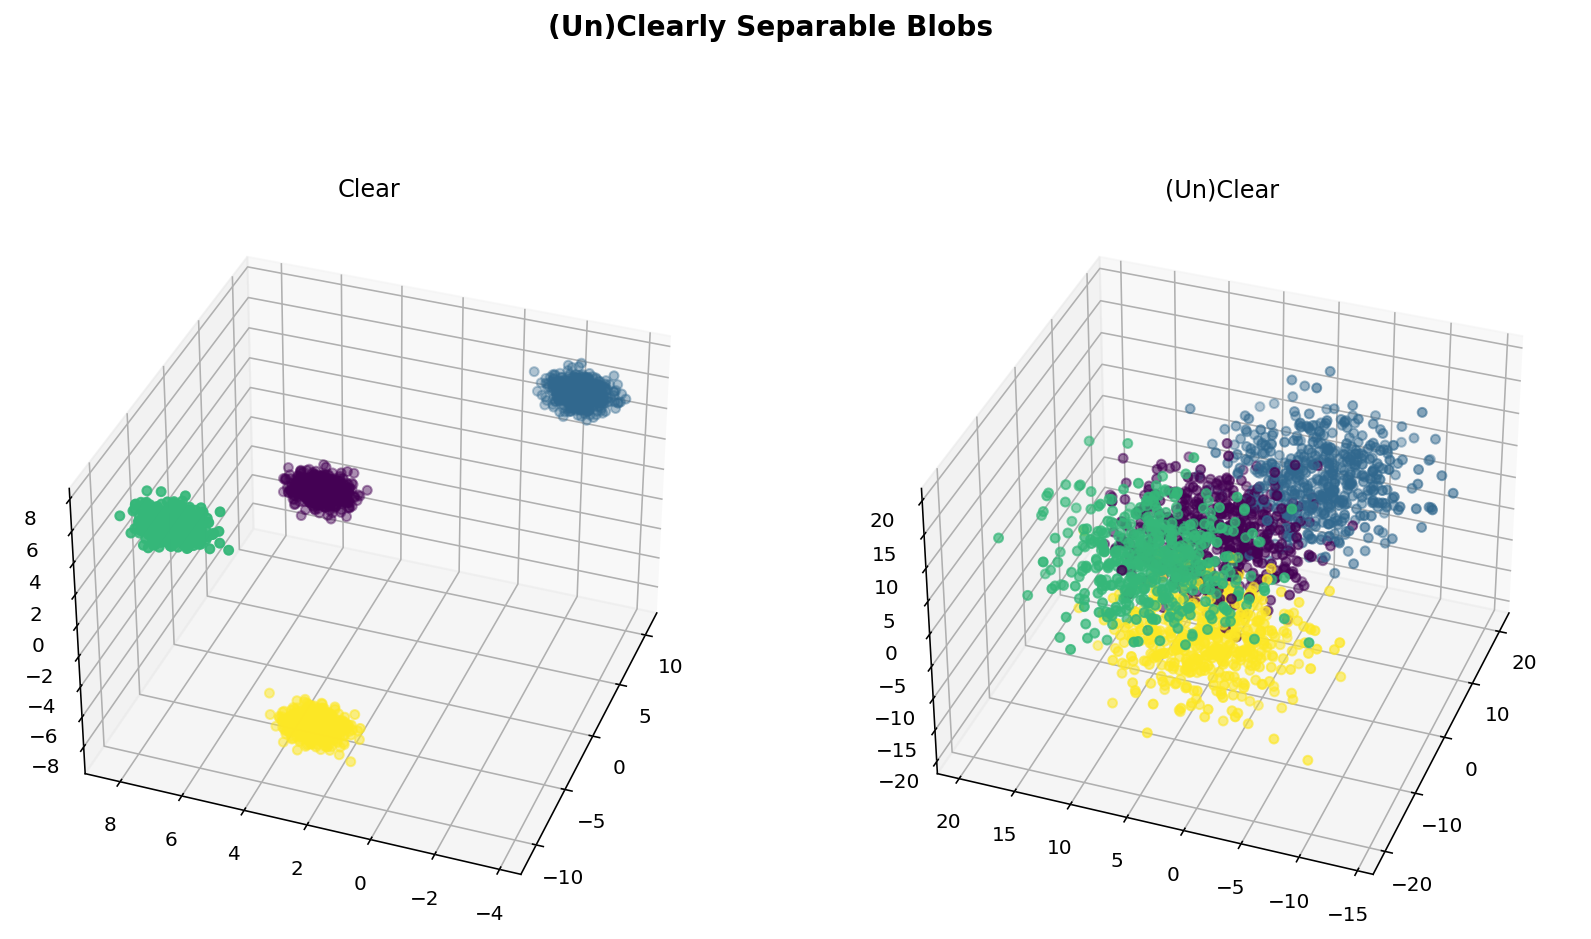

In [8]:
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

X, y = make_blobs(n_samples=2000, n_features=8, centers=4, cluster_std=0.5, random_state=0)
X2, y2 = make_blobs(n_samples=2000, n_features=8, centers=4, cluster_std=4, random_state=0)

fig = plt.figure(figsize=(14,8))
fig.suptitle('(Un)Clearly Separable Blobs', fontsize=14, fontweight='bold')
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
ax.view_init(35, 200)
ax.set_title('Clear')
ax = fig.add_subplot(1,2,2,projection='3d')
ax.scatter(X2[:,0], X2[:,1], X2[:,2], c=y)
ax.view_init(35, 200)
ax.set_title('(Un)Clear')
plt.show()

As expected by adding standard deviation, and making the data noiser the blobs become less clearly separable, which we can initially assume will make it a harder task for logistic regression splits and a potentially larger number of principal components will be required to explain the variation

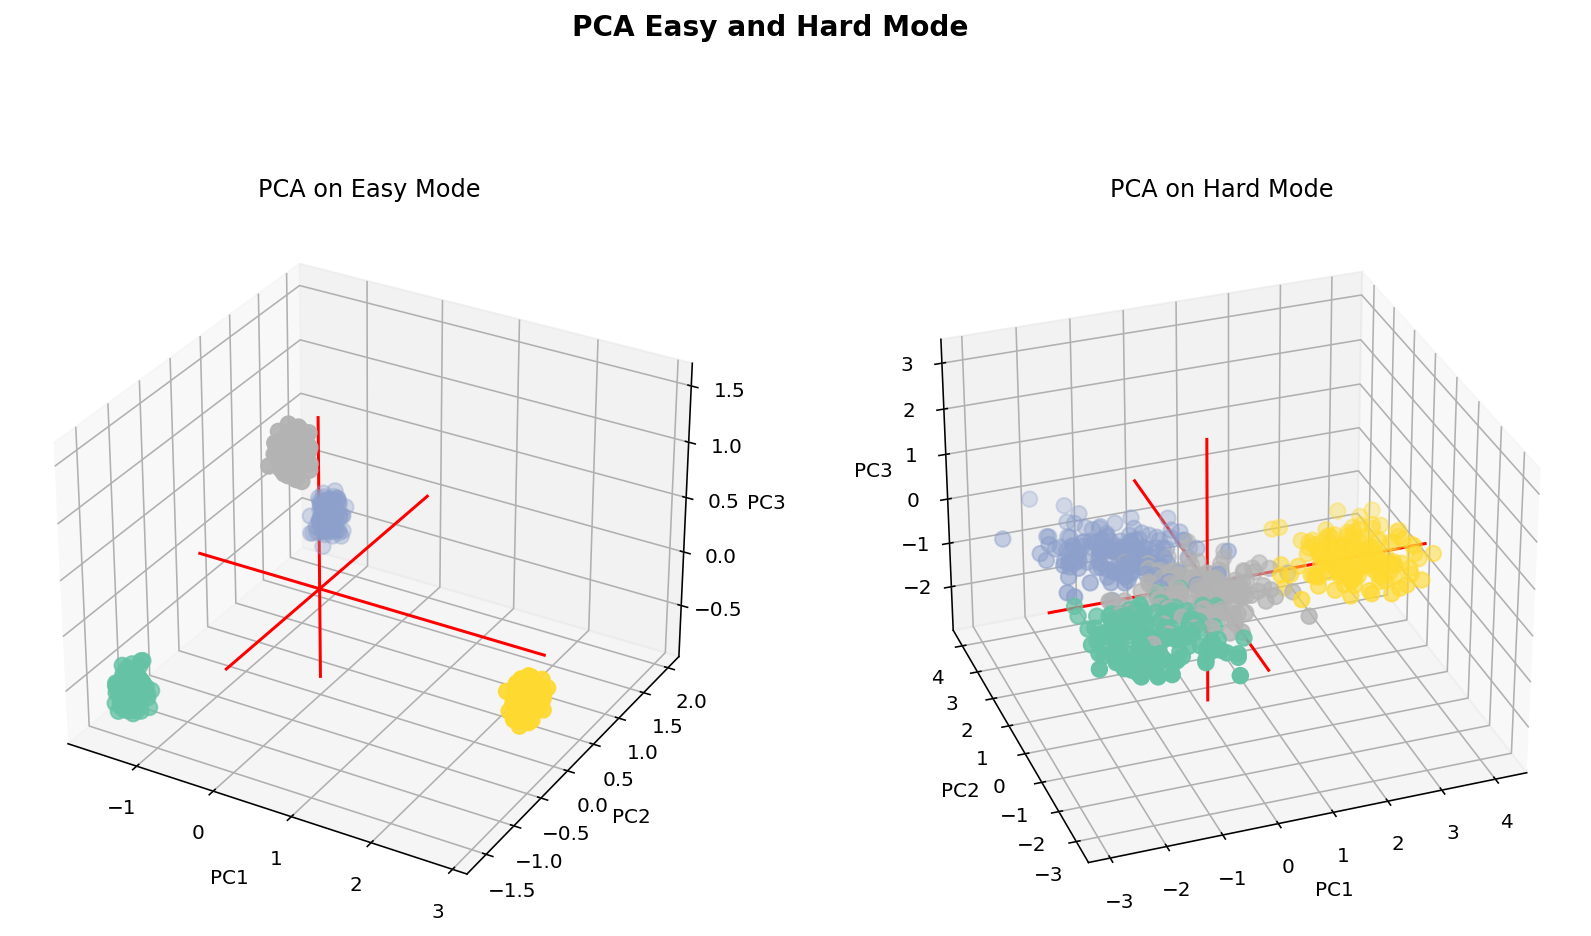

In [9]:
# Split both blob data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=42)
# Standardize the features (zero mean, unit variance) 
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) 
X_train_std2 = sc.fit_transform(X2_train) 
X_test_std = sc.transform(X_test)
X_test_std2 = sc.transform(X2_test)

# Initialising the models used, we want three principal components for plotting
pca = PCA(n_components=3)
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit and transform training data, given on PCA reduction to k(=2) principle components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_train_pca2 = pca.fit_transform(X_train_std2)
X_test_pca2 = pca.transform(X_test_std2)

# Form two data frames to carry the data for plotting, each column being a principal component
result=pd.DataFrame(pca.fit_transform(X_test_std), columns=['PCA%i' % i for i in range(3)])
result2=pd.DataFrame(pca.fit_transform(X_test_std2), columns=['PCA%i' % i for i in range(3)])

# Plot initialisation
fig = plt.figure(figsize=(14,8))
fig.suptitle('PCA Easy and Hard Mode', fontsize=14, fontweight='bold')
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=y_test, cmap="Set2_r", s=60)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on Easy Mode")

# Graphical aids to better represent the dimensions and intensity of components in all 3 dimensions
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

ax = fig.add_subplot(1,2,2, projection='3d')
#ax.scatter(X2[0],X2[1],y2)
ax.scatter(result2['PCA0'], result2['PCA1'], c=y2_test, cmap="Set2_r", s=60)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on Hard Mode")
# make simple, bare axis lines through space:
xAxisLine = ((min(result2['PCA0']), max(result2['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result2['PCA1']), max(result2['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result2['PCA2']), max(result2['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
ax.view_init(30, 250)
plt.show()

As hypothesised, initially we see that PCA performs a lot better and that the plotted 3 principal components on the first chart are quite enough to clearly decompose the data. On the countrary, the chart on the right shows overlapping blobs not clearly separable.

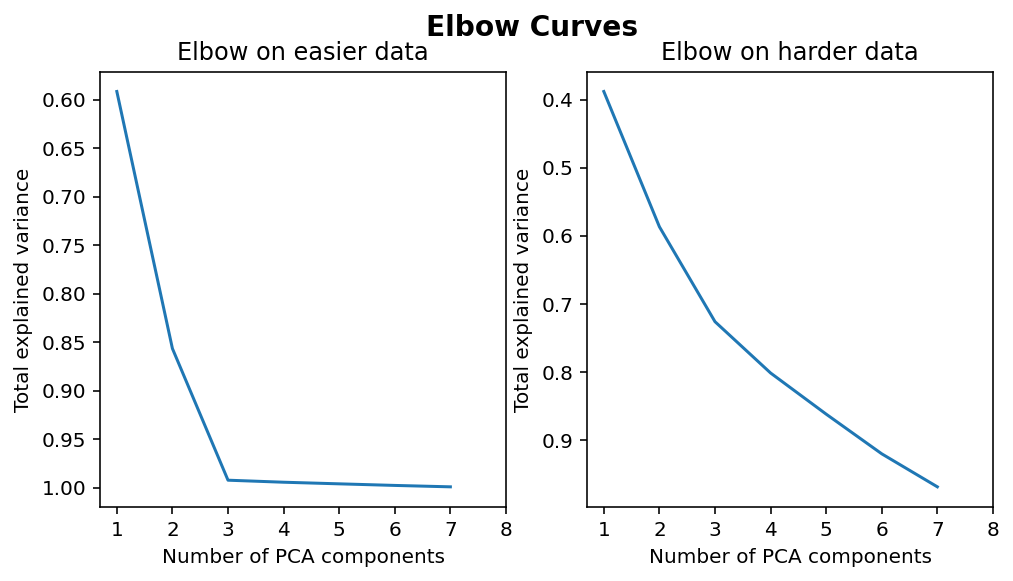

In [10]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('Elbow Curves', fontsize=14, fontweight='bold')

positions = (0, 1, 2,3,4,5,6,7)
lables = (1,2,3,4,5,6,7,8)
pca2 = PCA(n_components=7).fit(X_test_std)
ax = fig.add_subplot(1,2,1)
ax.plot(np.cumsum(pca2.explained_variance_ratio_))
ax.set_title("Elbow on easier data")
plt.gca().invert_yaxis()
plt.xticks(positions,lables)
plt.xlabel('Number of PCA components')
plt.ylabel('Total explained variance')

pca3 = PCA(n_components=7).fit(X_test_std2)
ax = fig.add_subplot(1,2,2)
ax.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.gca().invert_yaxis()
plt.xticks(positions,lables)
ax.set_title("Elbow on harder data")
plt.xlabel('Number of PCA components')
plt.ylabel('Total explained variance')
plt.show()

The elbow charts confirm what we saw on the PCA graph. At 3 principal components the left elbow chart saturates, the variability is fully explained hence 3 principal components would be enough to decompose the data with 4 clearly separable blobs. However in the right hand chart we see that even at 7 principal components not all the variability is explained, this is to be expected since the data was not linearly separable.

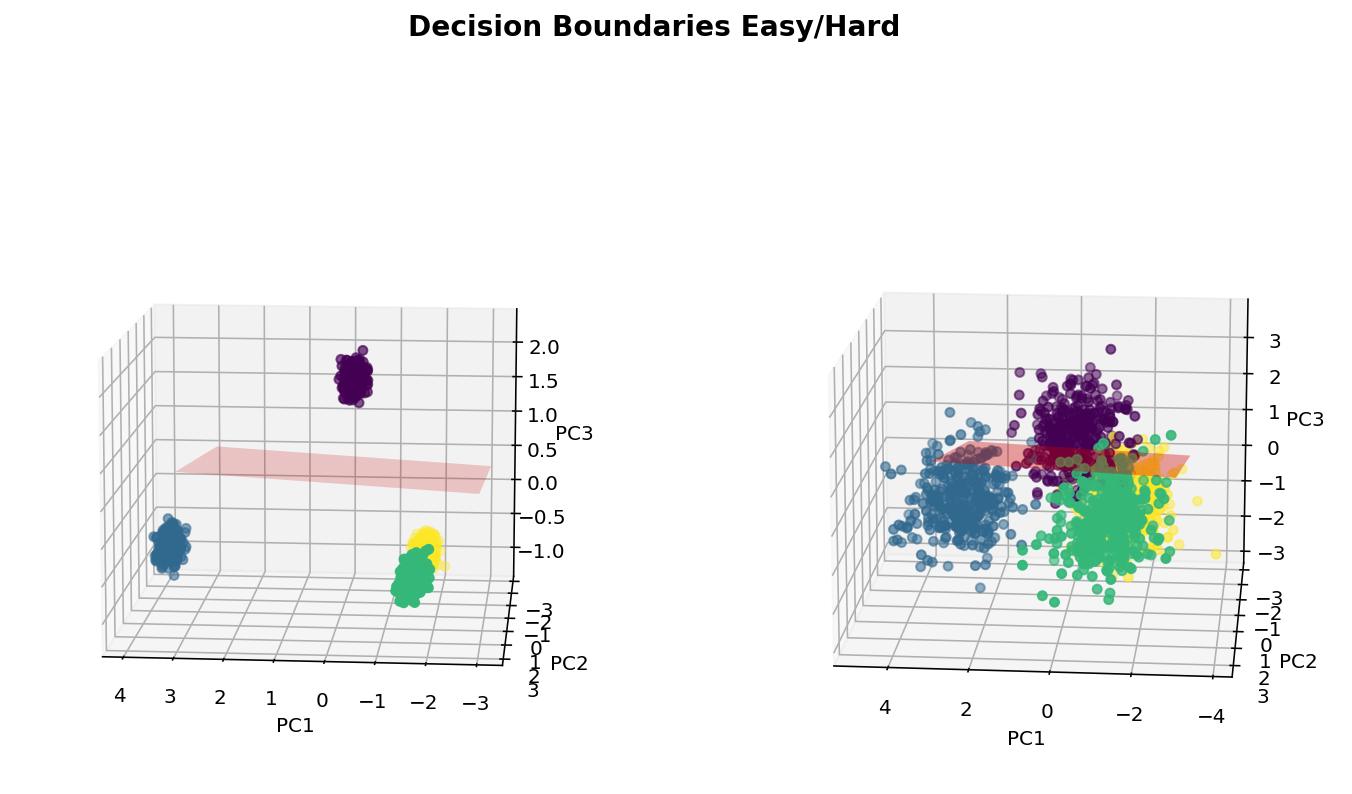

In [11]:
pca_easy = PCA(n_components = 3)
pca_hard = PCA(n_components = 3)
X_train_pca = pca_easy.fit_transform(X_train_std)
X_train_pca2 = pca_hard.fit_transform(X_train_std2)


x_cords = X_train_pca[:,0]
y_cords = X_train_pca[:,1]
z_cords = X_train_pca[:,2]

x_cords2 = X_train_pca2[:,0]
y_cords2 = X_train_pca2[:,1]
z_cords2 = X_train_pca2[:,2]

fig = plt.figure(figsize=(12,12))
fig.suptitle('Decision Boundaries Easy/Hard', fontsize=14, fontweight='bold')
tmp = np.linspace(-3,3,50)
x,y = np.meshgrid(tmp,tmp)

clf = lr.fit(X_train_pca, y_train) 
# https://datascience.stackexchange.com/questions/74620/plot-decision-boundary-in-3d-plot
z1 = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

ax = plt.subplot(221, projection="3d")
ax.scatter3D(x_cords, y_cords, z_cords, c = y_train)
ax.plot_surface(x, y, z1(x,y),alpha=0.2,color = 'red')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.view_init(11, 95) # rotation

clf2 = lr.fit(X_train_pca2, y2_train) 
z2 = lambda x,y: (-clf2.intercept_[0]-clf2.coef_[0][0]*x -clf2.coef_[0][1]*y) / clf2.coef_[0][2]
ax = plt.subplot(222, projection="3d")
ax.scatter3D(x_cords2, y_cords2, z_cords2, c = y2_train)
ax.plot_surface(x, y, z2(x,y),alpha=0.4,color = 'red')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.view_init(15, 95)

The chart shows clearly that in the case of 4 clearly separable blobs, linear regression is able to separate the blobs quite successfully. In the case with noise, as we suspected the linear regression cannot achieve a split successfuly. A more complex, nonlinear model in a higher dimension space would potentially be able to achieve a better result.

(b) 2 touching parabola spreads as shown in the lecture, but in 3d. Study and show elbow plot and prediction boundaries.

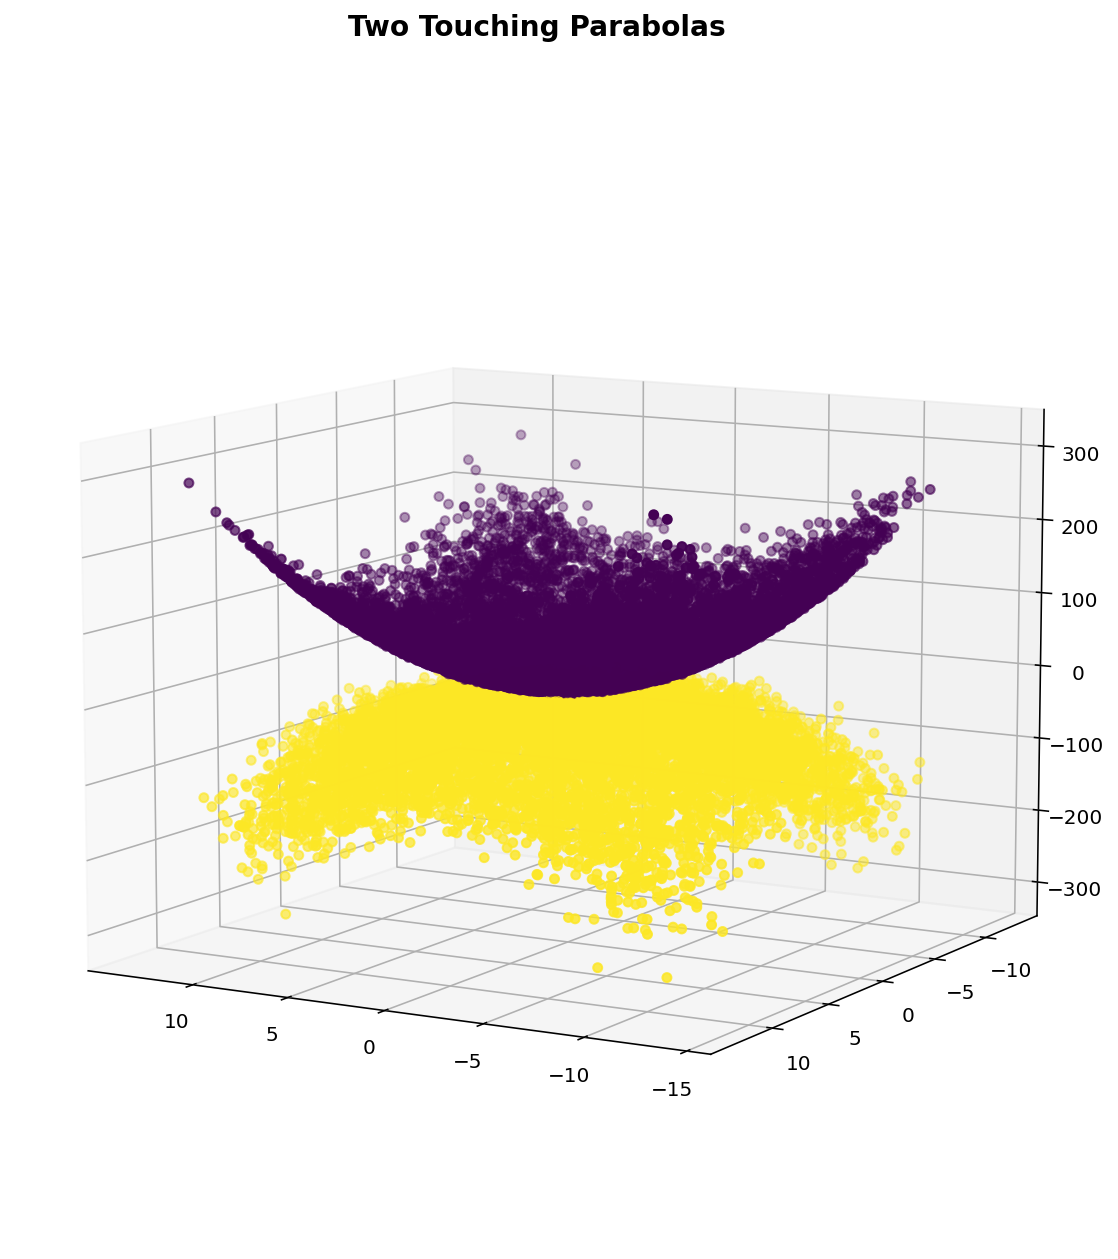

In [12]:
from numpy.random import default_rng
rng = np.random.default_rng(42)

def generate_parab():
    x_0 = np.linspace(-10, 10, 100) + rng.normal(0, 1, 100)
    y_0 = np.linspace(-10, 10, 100) + rng.normal(0, 1, 100)
    x_0, y_0 = np.meshgrid(x_0, y_0)
    x_0 += rng.normal(0, 1, (100, 100))
    y_0 += rng.normal(0, 1, (100, 100))
    z_0 = (x_0**2 + y_0**2) + rng.normal(0, 1, (100, 100))

    x_1 = np.linspace(-10, 10, 100) + rng.normal(0, 1, 100)
    y_1 = np.linspace(-10, 10, 100) + rng.normal(0, 1, 100)
    x_1, y_1 = np.meshgrid(x_1, y_1)
    x_1 += rng.normal(0, 1, (100, 100))
    y_1 += rng.normal(0, 1, (100, 100))
    z_1 = -(x_0**2 + y_0**2) + rng.normal(0, 1, (100, 100))

    x = np.vstack([x_0, x_1])
    y = np.vstack([y_0, y_1])
    z = np.vstack([z_0, z_1])

    X = np.vstack([x.reshape(-1), y.reshape(-1), z.reshape(-1)]).T
    y = np.concatenate([np.zeros(10000), np.ones(10000)])
    return X, y

X, y = generate_parab()
fig = plt.figure(figsize=(12,10))
fig.suptitle('Two Touching Parabolas', fontsize=14, fontweight='bold')
ax = fig.add_subplot(projection='3d')
ax.view_init(10, 120) # rotation
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
plt.show()

We generated two parabolas in three-dimension, which looks like two paraboloids touching.

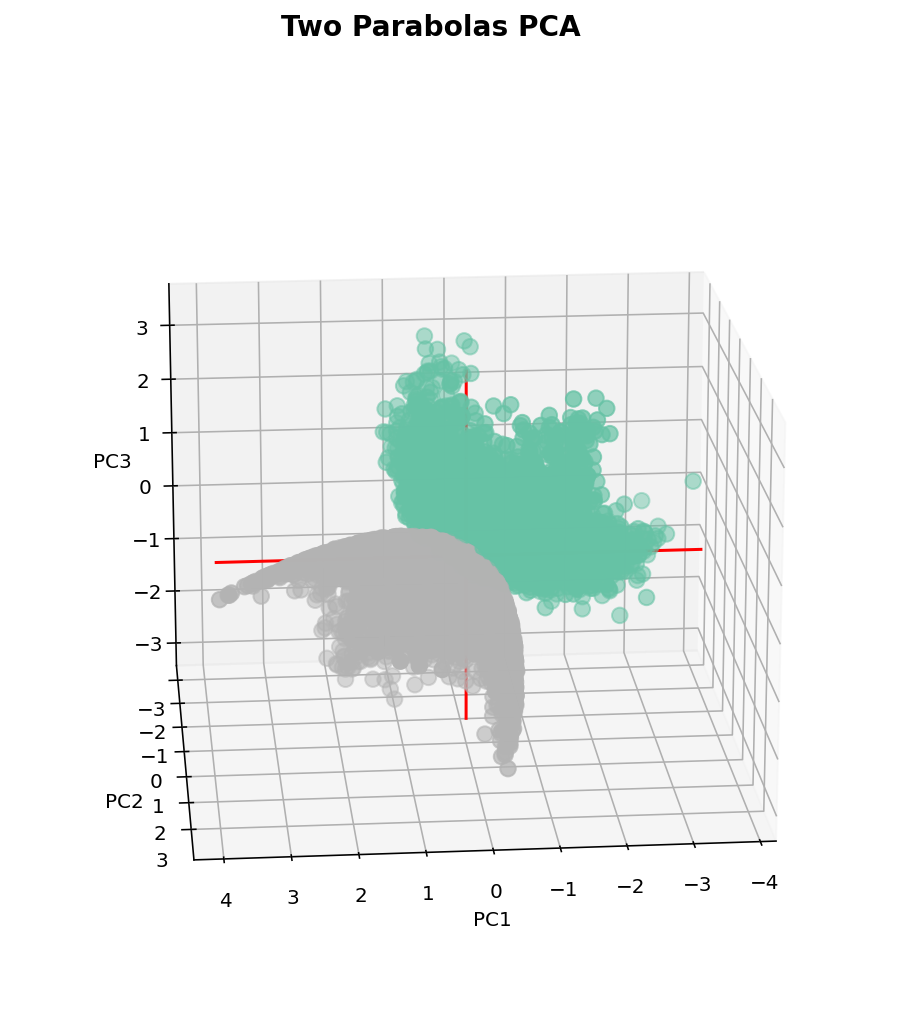

In [13]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Standardize the features (zero mean, unit variance) 
sc = StandardScaler()

# Fit results must be used later (mu and sigma)
X_train_std = sc.fit_transform(X_train)

# Normalize test data set with mu/sigma of training data
X_test_std = sc.transform(X_test)


# Set up PCA and logistic regression model
#pca = PCA(n_components=3)
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit and transform training data, given on PCA reduction to k(=2) principle components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# solves task, given 3 classes (as from y_train) 
lr.fit(X_train_pca, y_train)

result=pd.DataFrame(pca.fit_transform(X_test_std), columns=['PCA%i' % i for i in range(3)])

# Plot initialisation
fig = plt.figure(figsize=(10,8))
fig.suptitle('Two Parabolas PCA', fontsize=14, fontweight='bold')
ax = fig.add_subplot(projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=y_test, cmap="Set2_r", s=60)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
ax.view_init(18, 85) # rotation
plt.show()

We can see that the two prabolas can be linearly separated.

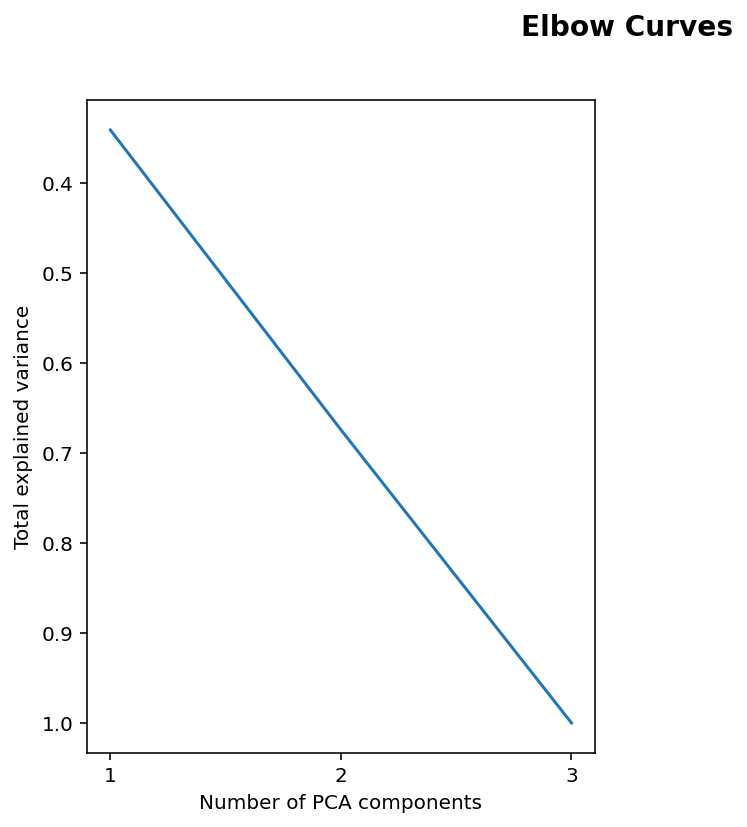

In [14]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Elbow Curves', fontsize=14, fontweight='bold')
positions = (0, 1, 2)
lables = (1,2,3)
pca2 = PCA(n_components=3).fit(X_train_pca)
ax = fig.add_subplot(1,2,1)
ax.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.gca().invert_yaxis()
plt.xticks(positions,lables)
plt.xlabel('Number of PCA components')
plt.ylabel('Total explained variance')
plt.show()

The variability is equally spread among the three principal components.

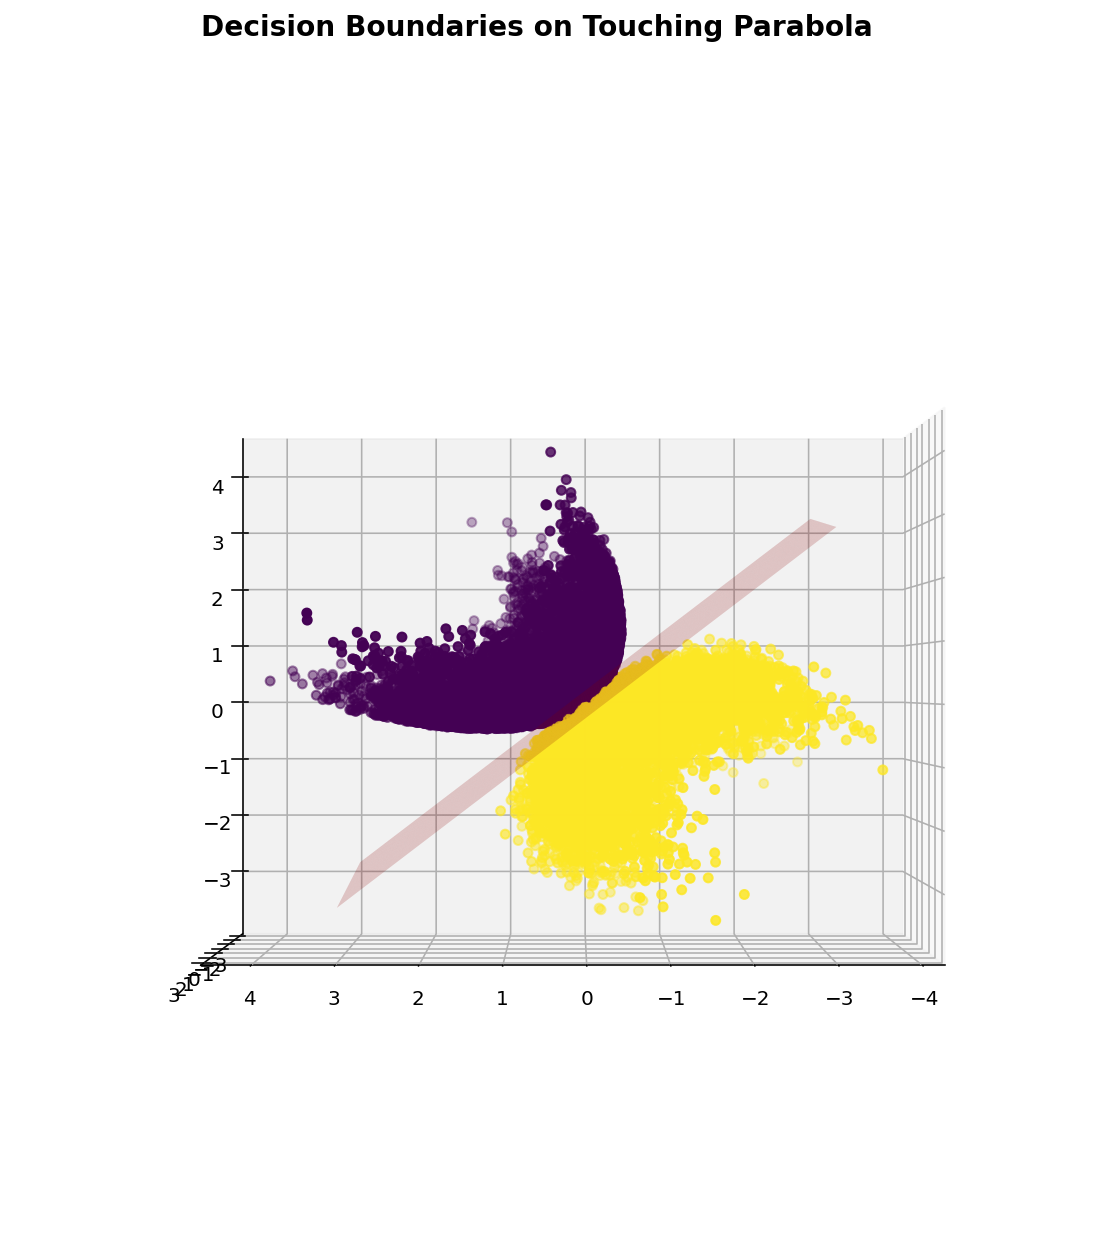

In [15]:
x_cords = X_train_pca[:,0]
y_cords = X_train_pca[:,1]
z_cords = X_train_pca[:,2]

fig = plt.figure(figsize=(12,10))
fig.suptitle('Decision Boundaries on Touching Parabola', fontsize=14, fontweight='bold')
tmp = np.linspace(-3,3,50)
x,y = np.meshgrid(tmp,tmp)

clf = lr.fit(X_train_pca, y_train) 
# https://datascience.stackexchange.com/questions/74620/plot-decision-boundary-in-3d-plot
z1 = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

ax = plt.subplot(projection="3d")
ax.scatter(x_cords, y_cords, z_cords, c = y_train)
ax.plot_surface(x, y, z1(x,y),alpha=0.2,color = 'red')
ax.view_init(0, 90)
plt.show()

We can see that the two parabolas are separated by the dicision boundary.